# 投资组合理论

In [64]:
# | code-fold: true
# 以下都是例行公事，直接拷贝即可

import pandas as pd
import numpy as np 

# 导入matplotlib.pyplot绘图库，其中plt.plot()是最常用的绘图函数之一
import matplotlib.pyplot as plt 

import seaborn as sns

sns.set_theme() # 默认用seaborn的绘图样式

plt.rcParams["font.sans-serif"]=["Microsoft YaHei"] #设置字体。如果不设置，中文会乱码。这里采用微软雅黑'Microsoft YaHei'，如果显示不正常，也可以使用黑体'SimHei'或者宋体'SimSun'等
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

# 绘图使用'svg'后端：svg是矢量格式，可以任意缩放均保持清晰，各种屏幕的显示良好。
%config InlineBackend.figure_formats = ['svg']

## 快速复习 

这里快速复习一下Markowitz资产组合模型，详情可见大部分投资学教材（如博迪的《投资学》）的相关章节。

### 2种资产的组合

考虑2种资产的组合，期望收益分别是$r_1,r_2$，各自的方差分别是$\sigma_1^2, \sigma_2^2$。投资的权重是$w_1, w_2$，其中$w_1+ w_2 = 1$。


那么组合期望收益就是：（简便起见这里就不写成期望形式了）

$$
r_p = w_1 r_1 + w_2 r_2
$$

组合的方差就是：

$$
\sigma_p^2 =  w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 + 2 w_1 w _2 \operatorname{Cov}(r_1,r_2)
$$

一个随机变量的方差，就是它自己和自己的协方差，因此上式又可以写成：

$$
\sigma_p^2 =  w_1^2 \operatorname{Cov}(r_1,r_1)+ w_2^2 \operatorname{Cov}(r_2,r_2) + 2 w_1 w _2 \operatorname{Cov}(r_1,r_2)
$$



上面的式子可以用协方差矩阵的形式来表示：

| 协方差矩阵 | $w_1$ | $w_2$ | 
|---------|:-----:|:------:|
| $w_1$      |  $\operatorname{Cov}(r_1,r_1)$ |   $\operatorname{Cov}(r_1,r_2)$ |  
| $w_2$     | $\operatorname{Cov}(r_2,r_1)$  |   $\operatorname{Cov}(r_2,r_2)$ |  

可见，组合的方差，就等于上面的矩阵中的每一个协方差，乘以对应的权重，再相加。

直接从上式可以得到结论：

1. 如果2种资产是负相关，那么他们的协方差就是负数（看最后一项），组合的方差必然下降。
2. 如果2种资产是正相关，但相关系数小于1，组合的标准差依然会低于2项资产的标准差的加权平均。





注意到，收益和方差计算中，唯一的变量是权重，那么我们可以把每一个权重，对应的收益和标准差计算出来，绘制在一张图上。

1. 选择第1个权重，如(0,1)，计算代入2个公式，计算$r_{p1},\sigma_{p1}$
2. 选择第2个权重，如(0.1,0.9)，计算代入2个公式，计算$r_{p2},\sigma_{p2}$
3. 选择第3个权重，如(0.2,0.8)，计算代入2个公式，计算$r_{p3},\sigma_{p3}$
4. ...

把上述收益和标准差的组合绘制出来，你会得到下图中一组曲线的其中一条，称为“投资组合可行集”。

横轴是标准差，纵轴是收益。（图来自博迪《投资学》11版）

![](images/return_sd.png){height=400px}

如果2种资产的相关性： 

1. 等于1，则组合的标准差是2者标准差的线性组合。
2. 小于1，则组合会有一个最小方差点（最小标准差点）：在这个组合下你可以获得最小方差。（两天蓝色线）
3. 等于-1，则某个组合可以让最小方差为0。

### 资产配置

![](https://pic4.zhimg.com/v2-fcc93a17db48f0ce95719904adb613db_r.jpg){height=300px}
<!-- ![](images/cal.png){height=400px} -->


引入无风险资产，比如国债等等。考虑无风险资产和风险资产的组合。因为无风险资产和组合之间的协方差为0，那么无风险资产和风险资产的组合的期望收益和方差的关系，就是一条直线。

称为：“资本配置线（CAL）”：

1. 如果全部投资于无风险资产，那么你获得了无风险收益率，同时组合方差为0：射线的最左端。
2. 随着你增加风险资产的比例，那么方差也等比增加：因此是一条射线。
3. 风险资产组合有无限种（权重的不同），反映为蓝色曲线（投资组合可行集）上的每一个点。那么纳入无风险资产，就是从$r_f$点，引出一条射线，穿过蓝线上的某个点。
4. 射线斜率就是夏普比率：衡量每单位风险，能够获得多少超额收益。
5. 所以穿过哪个点是最优的？斜率最高那条，即切线，则切点为“最优风险组合”。
  
$$
S_p=\frac{\mathrm{E}\left(r_p\right)-r_f}{\sigma_p}
$$




### 马科维茨资产组合选择模型

把2种资产的情况扩展到n种，那么上面的2资产公式可以推为：

组合的期望收益：

$$
r_p = \sum_{i=1}^n {w_i r_i}
$$

组合的方差：

$$
\sigma_p^2 = \sum_{j=1}^n \sum_{i=1}^n w_i w_j \operatorname{Cov}(r_i,r_j) 
$$

可以想象把前面的矩阵扩展到n行n列。


令$w$为权重，$\Sigma$为协方差矩阵，上面的式子可以写成矩阵：

$$
\sigma_p^2 = w^t \Sigma w
$$

（w的转置，乘以协方差矩阵，乘以w）



<!-- 给定收益率$r_p$，在n项资产中选择，我们依然能找到很多组合可以达到目标$r_p$。但是，这一大堆组合中，有一个是方差最低的（在收益率为$r_p$时），称之为最小方差组合。 -->

我们要做的，就是用蒙特卡洛模拟的方法（近似可以理解为穷举法），尝试极大量的组合，计算他们的收益和标准差，绘制在图上，最后计算出最佳的组合权重。

蛮力计算正是电脑擅长的。


## 数据来源

但后面的讲义示范会使用预先制作的范例数据（包括3只股票）。这里先简单介绍怎么获得股票的价格数据，最简单的方法，是用akshare这个包。`akshare`这个包可以提供大量的金融数据，说明在这个地址 [https://akshare.akfamily.xyz/introduction.html](https://akshare.akfamily.xyz/introduction.html)

1. 简单安装：在任何一个python单元格，执行以下代码，会从清华大学的镜像服务器下载并安装（注意开头有个感叹号）：
```
!pip install -i https://mirrors.tuna.tsinghua.edu.cn/pypi/web/simple akshare
```

当然，安装只要执行一次即可，今后使用不必再次安装。


2. 查看说明文档  [https://akshare.akfamily.xyz/introduction.html](https://akshare.akfamily.xyz/introduction.html)

3. 我们需要用A股的历史行情数据，说明在这里 [https://akshare.akfamily.xyz/data/stock/stock.html#id21](https://akshare.akfamily.xyz/data/stock/stock.html#id21)

4. 使用东方财富网作为数据源，说明在这里['https://akshare.akfamily.xyz/data/stock/stock.html#id22'](https://akshare.akfamily.xyz/data/stock/stock.html#id22)


例如，我们要读取平安银行(000001)的历史行情，可以这么写，这里采用"前复权"

注意：和akshare自己的说明不同，当前复权时候，日收益率才是正确的。如果你装了炒股软件，可以打开来看。


In [65]:
import akshare as ak

df = ak.stock_zh_a_hist(symbol="000001", period="daily", start_date="20170301", end_date='20240528', adjust="qfq")
df.iloc[:10,:10] # 查看前10行，和前10列

,日期,股票代码,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅
0,2017-03-01,000001,7.18,7.18,7.24,7.16,346994,330157968.0,1.12,0.14
1,2017-03-02,000001,7.20,7.12,7.23,7.11,403629,382395888.0,1.67,-0.84
2,2017-03-03,000001,7.10,7.09,7.12,7.05,342655,321952544.0,0.98,-0.42
3,2017-03-06,000001,7.09,7.14,7.15,7.08,404511,381212304.0,0.99,0.71
4,2017-03-07,000001,7.13,7.14,7.15,7.09,294673,277747408.0,0.84,0.00
5,2017-03-08,000001,7.12,7.11,7.14,7.09,244438,230425150.0,0.70,-0.42
6,2017-03-09,000001,7.10,7.07,7.12,7.05,378170,354813680.0,0.98,-0.56
7,2017-03-10,000001,7.07,7.09,7.10,7.05,390182,366140048.0,0.71,0.28
8,2017-03-13,000001,7.08,7.13,7.14,7.06,545304,513148480.0,1.13,0.56
9,2017-03-14,000001,7.12,7.13,7.15,7.10,404484,381594064.0,0.70,0.00


In [66]:
# 全部的字段包括
df.columns

Index(['日期', '股票代码', '开盘', '收盘', '最高', '最低', '成交量', '成交额', '振幅', '涨跌幅', '涨跌额',
       '换手率'],
      dtype='object')

在后续的例子中，我们使用收益率序列（后面会讲为什么），因此暂时只需要日期和涨跌幅两列。

In [67]:
sh000001_df = df[['日期','涨跌幅']].copy()
sh000001_df.columns = ['日期', '平安银行']
sh000001_df

,日期,平安银行
0,2017-03-01,0.14
1,2017-03-02,-0.84
2,2017-03-03,-0.42
3,2017-03-06,0.71
4,2017-03-07,0.00
...,...,...
1755,2024-05-22,0.09
1756,2024-05-23,-1.51
1757,2024-05-24,-0.86
1758,2024-05-27,1.93


同理，你可以下载任何你想要分析的股票的数据。

假如你要做n只股票的最优组合，你只要下载n只股票的数据，然后merge起来即可。

## 组合的预期收益和方差

范例数据`returns.xlsx`，里面包含了3只股票的日回报率数据。


In [68]:
#  读取数据并查看
df = pd.read_excel('data/returns.xlsx',converters={'日期':pd.to_datetime})

df.set_index('日期',inplace=True)
df.head() 

,比亚迪,美的集团,平安银行
日期,,,
2019-01-02,-0.035882,-0.011394,-0.020256
2019-01-03,-0.022575,-0.006586,0.009793
2019-01-04,0.053891,0.021823,0.050647
2019-01-07,0.014610,0.000000,-0.001026
2019-01-08,0.028994,-0.003514,-0.008214


收益率等于 
$$
r_1 = x_1/x_0 - 1
$$

对数收益率等于
$$
lr_1 = \ln {x_1/x_0} = \ln(r_1 + 1)
$$

从对数收益率算收益率
$$
r_1 = e^{lr_1} - 1
$$

为什么要用对数收益率？因为对数收益率具有可加性：持有2个时间段的收益率的对数，正好是2个时间段，各自对数收益率的直接相加。

$$
lr_{12} = lr_1 + lr_2
$$

如果不取对数，算起来会更麻烦：

$$
1 + r_{12} = (1 + r_1) * (1+r_2)
$$

取对数后，求和、求均值等等，都更加简单了：

1. 要算**一段时间**的收益率，只要从第一个交易的对数收益率，一直累加，加到最后一个交易日的对数收益率，就是这段时间的对数收益率。
2. 要算**年化**收益率，求整个序列的日平对数收益率，再乘以一年的交易日250即可。





从收益率计算对数收益率

In [69]:
rets = np.log(df + 1)
rets.head()

,比亚迪,美的集团,平安银行
日期,,,
2019-01-02,-0.036542,-0.011459,-0.020464
2019-01-03,-0.022834,-0.006608,0.009745
2019-01-04,0.052489,0.021588,0.049406
2019-01-07,0.014504,0.000000,-0.001027
2019-01-08,0.028582,-0.003520,-0.008248


利用收益率，我们可以算出期初投资1元的净值走势，（收益率+1）累乘即可，注意这里用普通收益率（非对数）

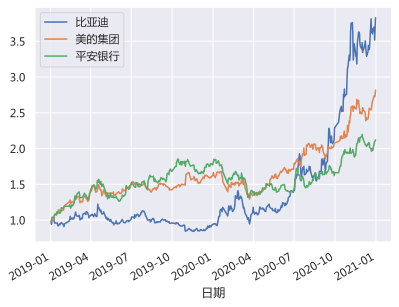

In [70]:
(df+1).cumprod().plot();

In [71]:
# 计算年化收益率
rets.mean()*250 # 对数收益率的可加性，求“均值 * 一年的交易日数”，就是年化（对数）收益率

比亚迪     0.688826
美的集团    0.531378
平安银行    0.385595
dtype: float64

In [72]:
rets.cov() * 250 # 年化协方差矩阵

,比亚迪,美的集团,平安银行
比亚迪,0.226201,0.054389,0.046846
美的集团,0.054389,0.098938,0.051926
平安银行,0.046846,0.051926,0.108442


### 给定权重的情况


要求最优组合，首先：

1. 给定权重，计算出这个组合年化收益率和方差。
2. 随机生成大量权重，计算计算这些随机权重的组合年化收益率和方差。
3. 绘制在图上。


第一步，我们首先求随便任何一个组合的情况。

首先，随机生成3个权重：

In [73]:
# 证券数量 number of assets
noa = rets.shape[1]
noa

3

In [74]:
weights = np.random.random(noa) # 生成3个随机数
weights /= np.sum(weights) # 使3个随机数的和为1
weights # 三只股票的占比（这里是随机的）

array([0.2868683 , 0.42443861, 0.28869309])

In [75]:
weights.sum()

1.0

计算组合的方差

$$
\sigma_p^2 = w^t \Sigma w
$$

In [76]:
np.dot(weights.T, np.dot(rets.cov() * 250 , weights)) # 矩阵乘法满足结合律

0.07920560772220829

显然标准差就是方差开根号

In [77]:
np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 250, weights))) 


0.2814349084996534

写2个函数，计算在特定的权重下，股票的收益率和方差。

rets：对数回报率的序列
rets.mean()：日均对数收益率
rets.mean() * weights ：乘以权重后的日均对数收益率

In [78]:
rets.mean() * weights

比亚迪     0.000790
美的集团    0.000902
平安银行    0.000445
dtype: float64

In [79]:
def port_ret(weights): 
    """年化对数收益率
    """
    return np.sum(rets.mean() * weights) * 250

def port_vol(weights): 
    """年化收益率的标准差
    """
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 250 , weights))) 

下一步，既然我们可以计算一组权重的情况，我们循环N次，每次随机生成一组权重，然后计算年化收益率和年化标准差。我们就可以获得N组（收益率, 标准差，权重）的组合。

In [80]:
prets = []  # 收益率
pvols = []  # 标准差
w = [] # 权重
for p in range (5000):  # 重复5000次

    # 生成一个随机权重
    weights = np.random.random(noa)  
    weights /= np.sum(weights)  # 每次重复，都随机取得3个权重。
    w.append(weights) 

    # 计算
    prets.append(port_ret(weights))  # 计算组合收益
    pvols.append(port_vol(weights))  # 计算组合标准差
    
prets = np.array(prets) 
pvols= np.array(pvols) 

### 最小方差点


In [81]:
# pvols保存了所有标准差
# np.where(pvols == min(pvols): 标准差最小的那个权重是几号？

i = (np.where(pvols == min(pvols)))[0][0]
w[i].round(3) # 权重

array([0.133, 0.466, 0.401])

绘图

把前面随机生成的5000个权重，以及对应的收益和标准差，绘制在图上。

横轴是标准差，纵轴是收益率。

在最小方差点上画一个x。

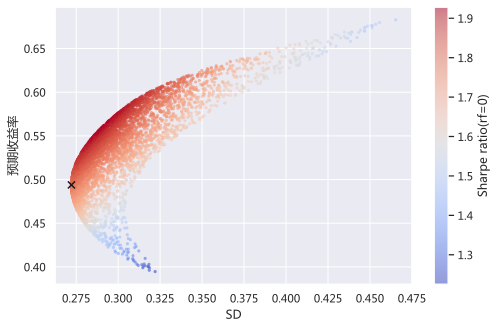

In [82]:
plt.figure(figsize=(8, 5)) 
plt.scatter(pvols, prets, c=prets / pvols, 
            marker='o', cmap='coolwarm',s = 5,alpha=0.5) 
plt.colorbar(label='Sharpe ratio(rf=0)');  # 
plt.scatter(pvols[i],prets[i],c='k',s = 50,marker='x') # 最小方差点
plt.xlabel('SD') 
plt.ylabel('预期收益率') ;

## 练习1

请你自选几只股票或者合约（不少于3只）

1. 下载并整合数据
2. 完成上述蒙特卡洛模拟过程
3. 计算最小方差点并绘图

## 风险资产的有效边界

前面我们绘制了预期收益和标准差之间从关系，显然给定收益，正常人都会选择风险最小的组合，即风险资产的**最小方差边界**，就是上图中全部点所在区域的左侧边界。

在最小方差边界中，最小方差点之上的部分，称为**风险资产有效边界**。在这条线上点，表示给定收益的最小风险，或者给定风险的最大收益。

显然，我们实际会选择的组合必然在条线上。



### 最小标准差组合



我们的做法是给定一个收益率，比如0.55，然后求标准差最低的组合。


In [83]:
import scipy.optimize as sco

In [84]:
tret = 0.55  # 目标收益率

bnds = tuple((0, 1) for x in weights)  # 3个权重的区间都是0到1

cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - tret},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

eweights = np.array(noa * [1. / noa, ])

res = sco.minimize(port_vol, eweights, method='SLSQP',
                   bounds=bnds, constraints=cons)


给定tret = 0.55，最小的标准差是

In [85]:
res.fun

0.28551471742741286

对应的权重是

In [86]:
res.x

array([0.27144962, 0.56311774, 0.16543264])

In [87]:
def find_min_sd(tret):
    '''对于指定的收益率tret，找到最小标准差的组合，并返回标准差'''
    bnds = tuple((0, 1) for x in weights)  # 3个权重的区间都是0到1

    cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - tret},
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

    eweights = np.array(noa * [1. / noa, ])

    res = sco.minimize(port_vol, eweights, method='SLSQP',
                    bounds=bnds, constraints=cons) 

    return res.fun


find_min_sd(0.55)

0.28551471742741286

### 计算有效边界

对于0.45到0.68之间的收益率，切成50段，对其中每一个收益率，都计算小标准差组合。

In [88]:
trets = np.linspace(0.45, 0.68, 50) 

tvols = np.array([find_min_sd(tret) for tret in trets])

In [89]:
i = np.where(tvols == min(tvols))[0][0]

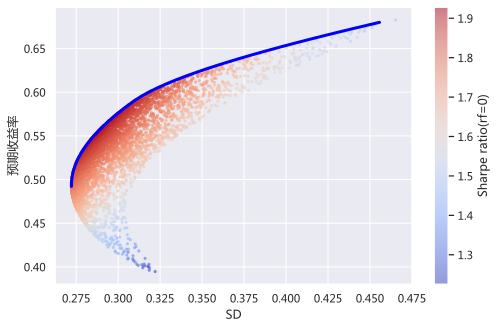

In [90]:
plt.figure(figsize=(8, 5)) 
plt.scatter(pvols, prets, c=prets / pvols, 
            marker='o', cmap='coolwarm',s = 5,alpha=0.5) 
plt.colorbar(label='Sharpe ratio(rf=0)');  # 
plt.plot(tvols[i:],trets[i:],c='blue',lw=3)
#plt.scatter(tvols[i], trets[i], c='k',s = 50,marker='x')
plt.xlabel('SD') 
plt.ylabel('预期收益率') ;

## 练习2

在练习1的基础上，计算并绘制你的组合的有效边界

## 资本市场线

把无风险资产加入组合


令资本市场线 为 $ y = a + b x$，有效边界为$y=f(x)$，有几个条件：

1. 截距=无风险利率
2. 资本市场线和有效边界在$x$处相交
3. 资本市场线和有效边界在$x$处斜率相等

令有有效边界为$f(x)$，资本市场线会与有效边界相切，那么在切点$x$上，两者的一阶倒数相等。

$$
b = f'(x)
$$

问题在于，有效边界是我们用模拟方法（大量的取点）计算出来的，有效边界的数据本质上以一系列的点，如何获得有效边界的一阶导数？

1. `splrep()`函数：可以对给定的x序列和y序列，拟合一条样条曲线。
2. `splev()`函数：利用上一步获得的曲线，可以对x求函数值或者一阶导函数的值。


In [91]:
import scipy.interpolate as sci
ind = np.argmin(tvols)
evols = tvols[ind:] # 有效边界的横轴（标准差）
erets = trets[ind:] # 有效边界的纵轴（收益率）

# 获得有效边界的样条曲线
tck = sci.splrep(evols, erets)


def f(x):
    ''' 有效边界函数 (样条曲线逼近). '''
    return sci.splev(x, tck, der=0)


def df(x):
    ''' 样条曲线函数的一阶导函数 '''
    return sci.splev(x, tck, der=1)


对于任何一个$x$，我们都可以获得有效边界的值$f(x)$，以及一阶导数$f'(x)$

In [92]:
x = 0.325
print(f'{f(x)=}, {df(x)=}')

f(x)=array(0.60642485), df(x)=array(0.87363672)


我们令 $p = \{a,b,x\}$，分别表示资本市场线的截距、斜率、以及切点的横坐标。

资本市场线的三个条件，可以写成方程组：

1. 截距=无风险利率， $a = r_f$ ：`a = rf`
2. 资本市场线和有效边界在$x$处相交，$f(x) = a + b*x$：`f(x) = a + b * x`
3. 资本市场线和有效边界在$x$处斜率相等，$b = f'(x)$：`b = df(x)`

用`fsolve()`函数可以解这个方程，参数分别是：

1. 方程组。
2. 初始参数：这是你对解的合理的猜测。如果猜得太远，就无法给出正确的解。

我们猜测，无风险利率给定为0.05，切点大概在0.3附近，斜率猜测是1左右（45°），那么我们对p的猜测就是`[0.05, 0.5, 0.3]`。

In [93]:
# 资本市场线的方程组
def equations(p, rf=0.05):
    a,b,x = p
    eq1 = rf - a
    eq2 = a + b * x - f(x)
    eq3 = b - df(x)
    return eq1, eq2, eq3

# 求解方程组
opt = sco.fsolve(equations, [0.05, 0.5, 0.3])


看看求解的结果：

In [94]:
opt # 分别是rf = a, b, x 。其中x是切点所在的SD。

array([0.05      , 1.75627377, 0.29341009])

把求解的结果代入方程组，看看是不是所有方程都为0。

In [95]:
np.round(equations(opt), 4)

array([0., 0., 0.])

绘图

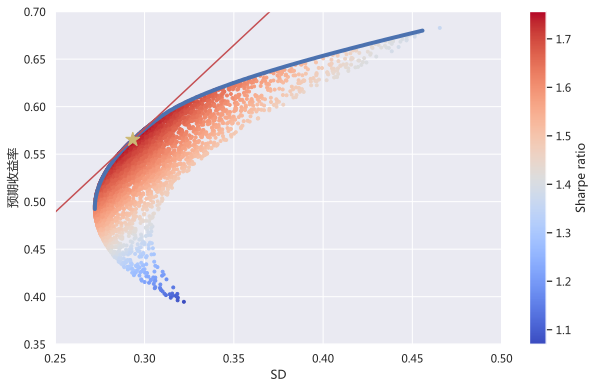

In [96]:
plt.figure(figsize=(10, 6)) 

# 散点
plt.scatter(pvols, prets, c=(prets - 0.05) / pvols, 
            marker='.', cmap='coolwarm') 

# 有效边界
plt.plot(evols, erets, 'b', lw=4.0) 

# 资本市场线
cx = np.linspace(0.0, 0.4) 
plt.plot(cx, opt[0] + opt[1] * cx, 'r', lw=1.5) 

# 切点
plt.plot(opt[2], f(opt[2]), 'y*', markersize=15.0) 

plt.xlabel('SD') 
plt.ylabel('预期收益率') 
plt.colorbar(label='Sharpe ratio') 

plt.xlim((0.25,0.5)) # 绘图的范围，可以自行调整
plt.ylim((0.35,0.7));

### 从切点反求组合

注意到，`opt[2]`就是切点的横坐标（SD），那么`f(opt[2])`就是切点的纵坐标（预期收益率）

按照我们前面求有效边界的方法：指定预期收益率，求最小化波动率的组合，代码基本一样。


In [97]:
cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - f(opt[2])}, # 指定的预期收益率
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

res = sco.minimize(port_vol, eweights, method='SLSQP',
                   bounds=bnds, constraints=cons)

res['x'].round(2)

array([0.31, 0.59, 0.1 ])

因此，切点组合就是：31%的比亚迪，59%的美的集团，10%的平安银行。进一步，你可以在无风险资产($r_f = 0.05$)和切点组合之间进行选择你希望的比例，构成最终组合。

## 练习3

在练习1和练习2的基础上，计算你的最优组合，绘图，并给出每只股票的权重。